In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Basseti-Erskine formula

sigmaz = 300e-6
sigmax = 516e-9
sigmay = 7.7e-9
Q = -3.2e-9

from scipy.special import erf
from scipy.constants import epsilon_0
def w(z):
    return np.exp(-z**2) * ( 1 + erf(1.j*z) )

def evaluate_E(x, y):
    E_complex = Q/(4*np.pi*epsilon_0*sigmaz*np.sqrt((sigmax**2 - sigmay**2))) * ( 
        w( (x+1j*y)/np.sqrt(2*(sigmax**2 - sigmay**2)) ) \
        - np.exp( -x**2/(2*sigmax**2) - y**2/(2*sigmay**2) ) * w( (x*sigmay/sigmax + 1j*y*sigmax/sigmay)/np.sqrt(2*(sigmax**2 - sigmay**2)) ) \
    )
    return E_complex.imag, E_complex.real

In [3]:
from openpmd_viewer import OpenPMDTimeSeries

In [4]:
ts = OpenPMDTimeSeries('./diags/diag1/')

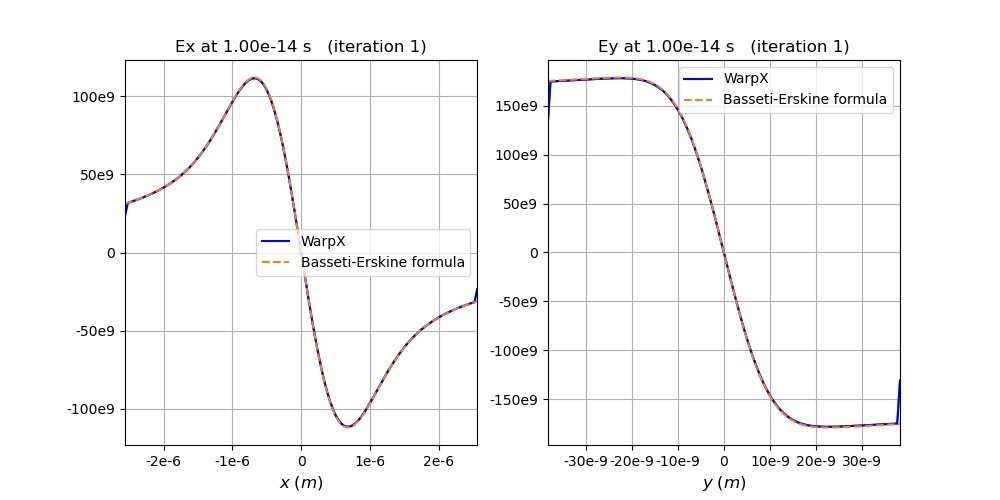

In [5]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
Ex, info = ts.get_field('E', 'x', slice_across=['y', 'z'], iteration=1, plot=True );
plt.plot(info.x, Ex, 'b-', label='WarpX')
Ex_th, Ey_th = evaluate_E( info.x, 0 )
plt.plot( info.x, Ex_th, '--', label='Basseti-Erskine formula' )
plt.legend(loc=0)
plt.grid()


plt.subplot(122)
Ey, info = ts.get_field('E', 'y', slice_across=['x', 'z'], iteration=1, plot=True );
plt.plot(info.y, Ey, 'b-', label='WarpX')
Ex_th, Ey_th = evaluate_E( 0, info.y )
plt.plot( info.y, Ey_th, '--', label='Basseti-Erskine formula' )
plt.legend(loc=0)
plt.grid()